# **Binary Classification of Machine Failures**

## **Importing Libraries**

In [122]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA,NMF
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


## **Data Descripcion**

In [76]:
train='train.csv'
test='test.csv'
sample_submision='sample_submission.csv'
original='machine failure.csv'
df_train=pd.read_csv(train,sep=',')
df_test=pd.read_csv(test,sep=',')
df_sample=pd.read_csv(sample_submision,sep=',')
df_original=pd.read_csv(original,sep=',')

In [77]:
print(df_train.shape)
print(df_test.shape)
print(df_sample.shape)
print(df_original.shape)

(136429, 14)
(90954, 13)
(90954, 2)
(10000, 14)


In [78]:
df_train.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [79]:
df_test.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [80]:
df_original.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [81]:
col_numeric=['Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']
target=['Machine failure']
col_categoric=['TWF', 'HDF', 'PWF', 'OSF','RNF']

In [82]:
df_train[col_numeric].describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count        136429.000000            136429.000000           136429.000000   
mean            299.862776               309.941070             1520.331110   
std               1.862247                 1.385173              138.736632   
min             295.300000               305.800000             1181.000000   
25%             298.300000               308.700000             1432.000000   
50%             300.000000               310.000000             1493.000000   
75%             301.200000               310.900000             1580.000000   
max             304.400000               313.800000             2886.000000   

         Torque [Nm]  Tool wear [min]  
count  136429.000000    136429.000000  
mean       40.348643       104.408901  
std         8.502229        63.965040  
min         3.800000         0.000000  
25%        34.600000        48.000000  
50%        40.400000       106.000000  
75%        46.100000       159.000000  
max        76.600000       253.000000

In [83]:
df_original[col_numeric].describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  
count  10000.000000     10000.000000  
mean      39.986910       107.951000  
std        9.968934        63.654147  
min        3.800000         0.000000  
25%       33.200000        53.000000  
50%       40.100000       108.000000  
75%       46.800000       162.000000  
max       76.600000       253.000000

In [84]:
df_test[col_numeric].describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         90954.000000             90954.000000            90954.000000   
mean            299.859493               309.939375             1520.528179   
std               1.857562                 1.385296              139.970419   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.700000             1432.000000   
50%             300.000000               310.000000             1493.000000   
75%             301.200000               310.900000             1579.000000   
max             304.400000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  
count  90954.000000     90954.000000  
mean      40.335191       104.293962  
std        8.504683        63.871092  
min        3.800000         0.000000  
25%       34.600000        48.000000  
50%       40.500000       106.000000  
75%       46.200000       158.000000  
max       76.600000       253.000000

## **EDA**

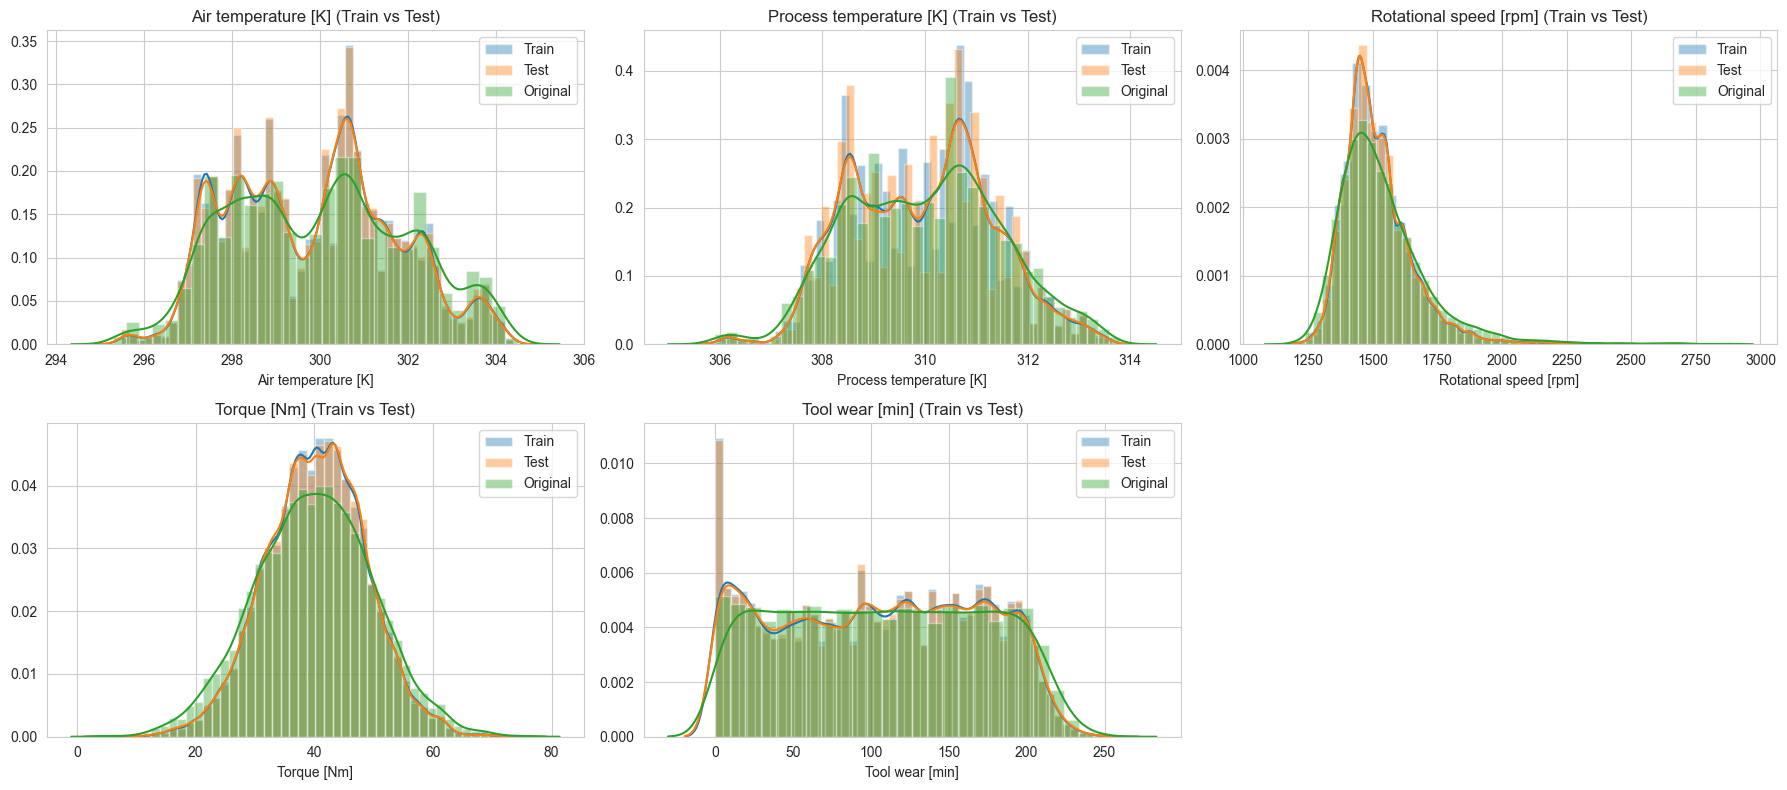

In [85]:
rows=2
columns=3
# Calcula el número total de subgráficos
total_plots = rows * columns

# Define el tamaño de la figura
plt.figure(figsize=(18, 8))
for i, col in enumerate(col_numeric):
    if i < total_plots:
        plt.subplot(rows,columns,i+1)
                # Traza el histograma para el column actual
        sns.distplot(df_train[col], label='Train', kde=True)
        sns.distplot(df_test[col], label='Test', kde=True)
        sns.distplot(df_original[col], label='Original', kde=True)
        
        # Añade título, etiquetas y leyenda
        plt.title(f'{col} (Train vs Test)')
        plt.ylabel('')
        plt.legend()
    else:
        # Si el índice excede el número total de subgráficos, sale del bucle
        break

# Ajusta el diseño de los subgráficos
plt.tight_layout()

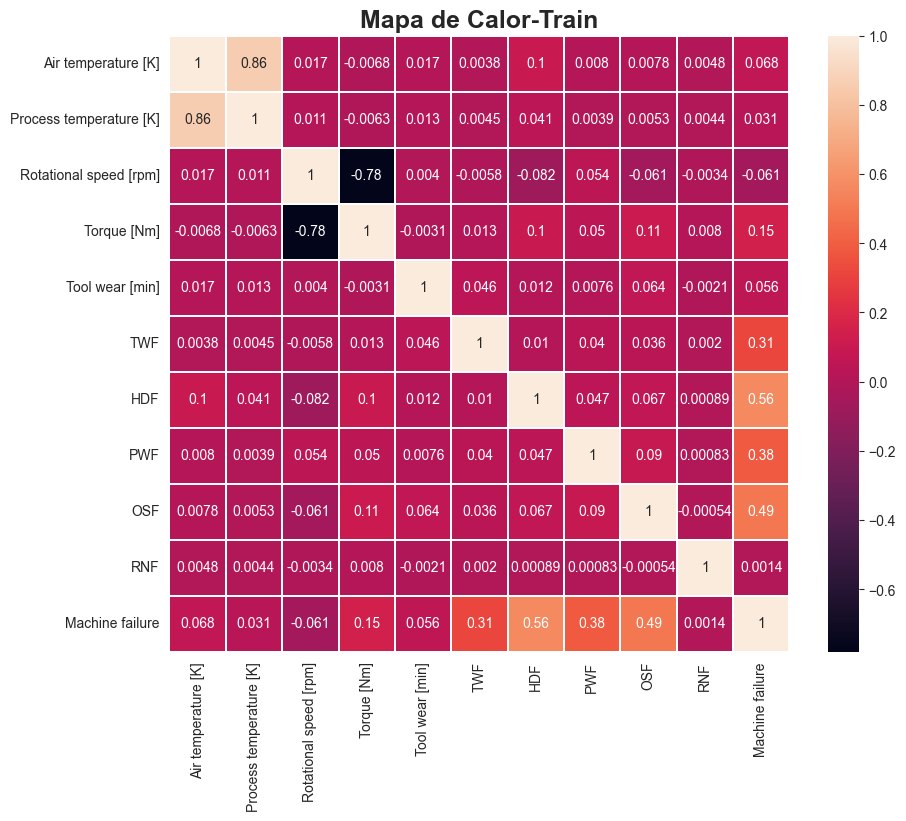

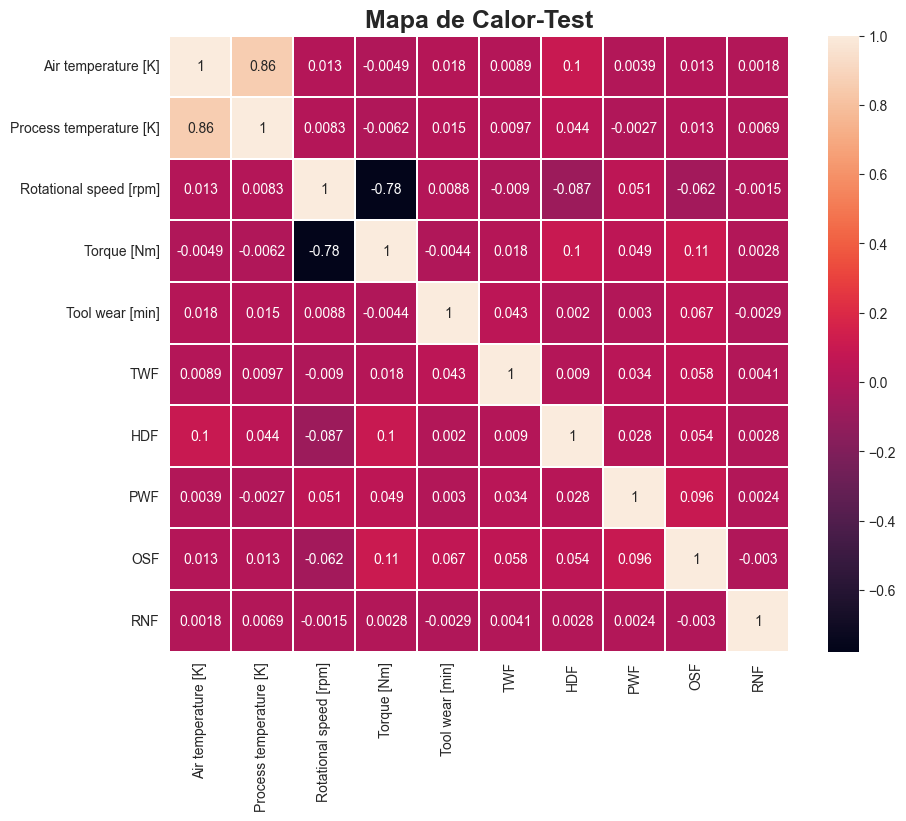

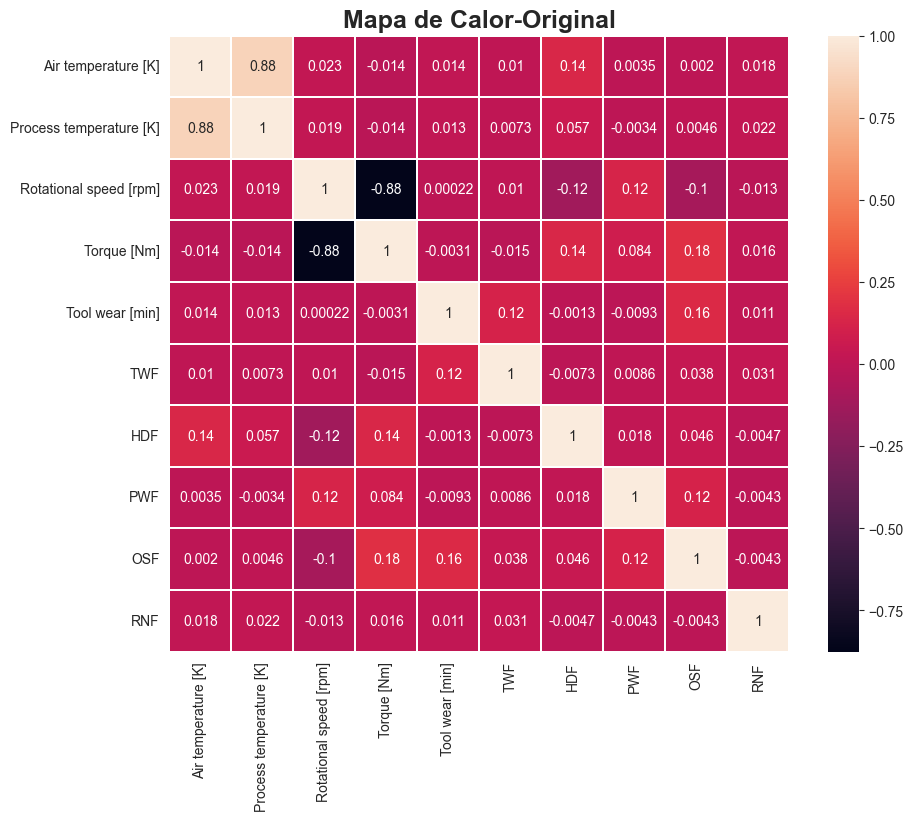

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train[col_numeric+col_categoric+target].corr(),annot=True,linecolor='white',linewidths=0.2)
plt.title('Mapa de Calor-Train',fontsize=18,weight='bold')
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df_test[col_numeric+col_categoric].corr(),annot=True,linecolor='white',linewidths=0.2)
plt.title('Mapa de Calor-Test',fontsize=18,weight='bold')
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df_original[col_numeric+col_categoric].corr(),annot=True,linecolor='white',linewidths=0.2)
plt.title('Mapa de Calor-Original',fontsize=18,weight='bold')
plt.show()

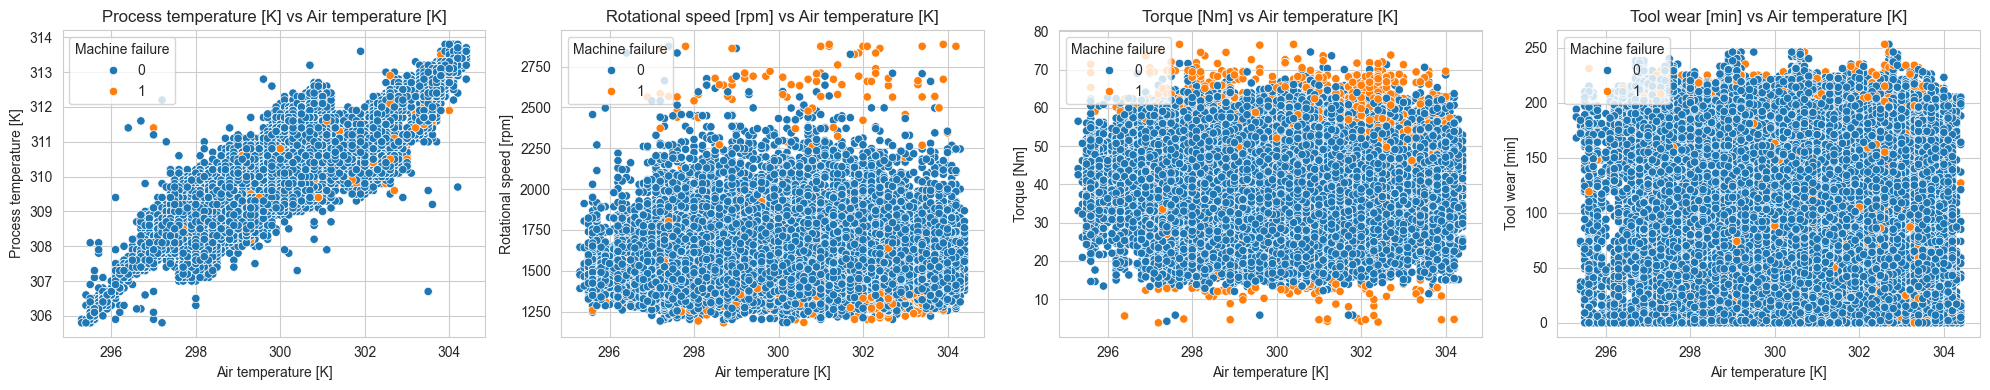

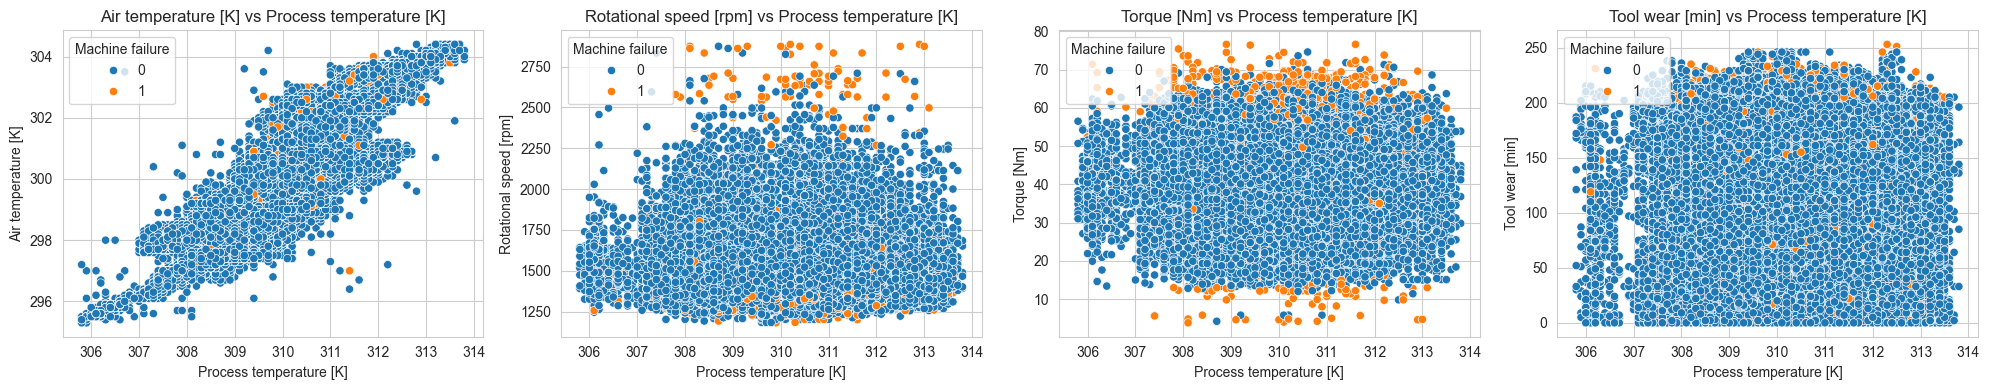

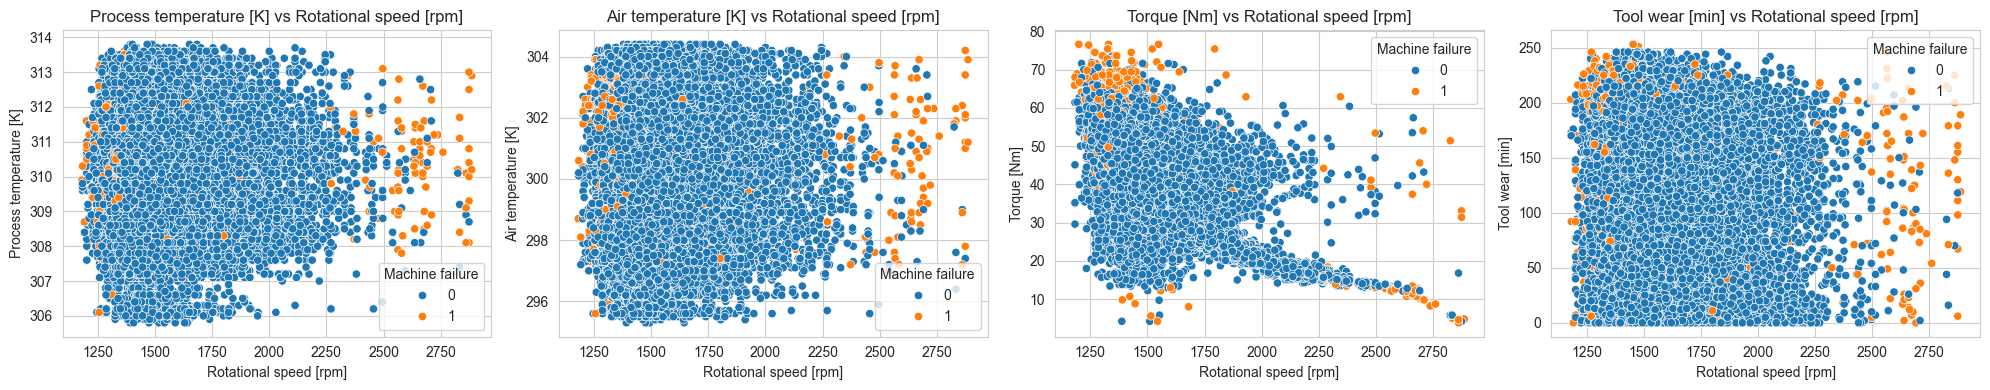

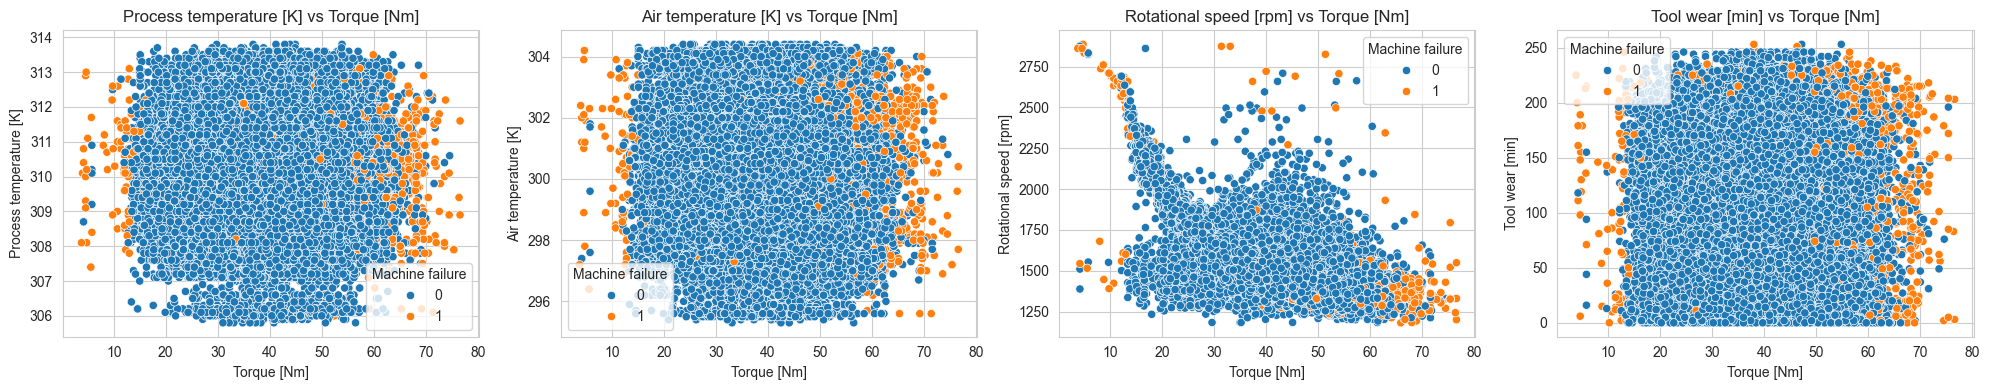

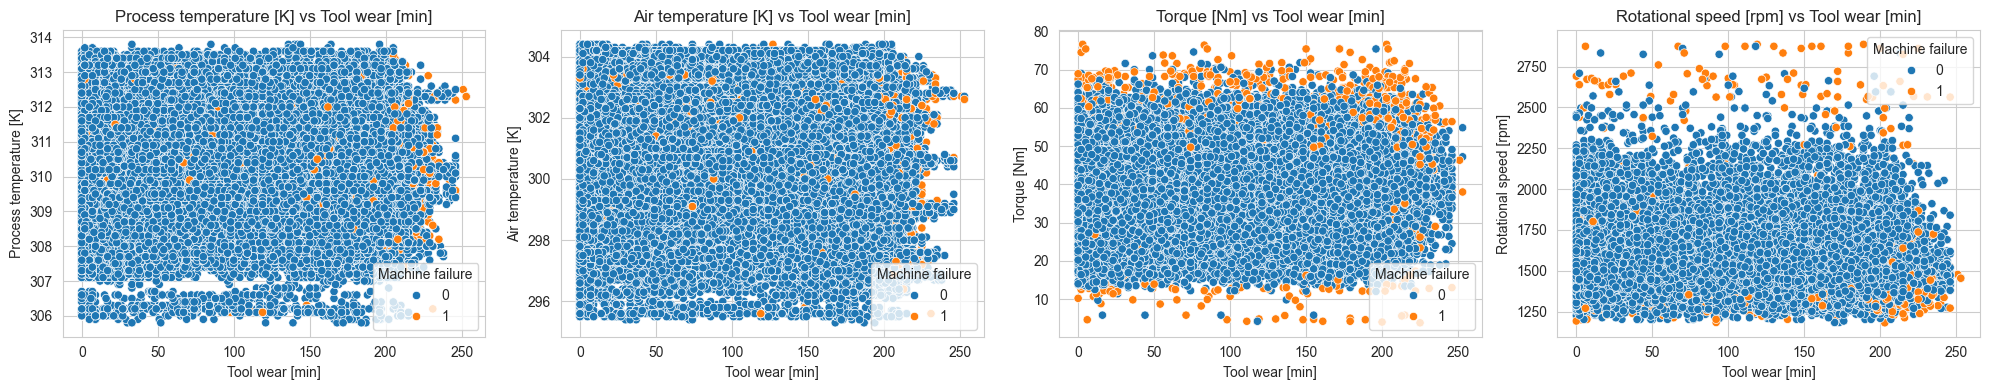

In [87]:
# Define las columnas en las que se dividirá el gráfico
col_1 = ['Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
# Define el tamaño de la figura
plt.figure(figsize=(20, 4))
# Itera sobre las columnas
for i, col in enumerate(col_1):
    # Crea la subfigura
    plt.subplot(1, 4, i+1)
    # Traza el scatterplot
    sns.scatterplot(data=df_train, x='Air temperature [K]', y=col, hue='Machine failure')
    # Añade título
    plt.title(f'{col} vs Air temperature [K]')
    # Ajusta el espacio entre subgráficos
    plt.tight_layout()
# Muestra el gráfico
plt.show()

# Define las columnas en las que se dividirá el gráfico
col_2 = ['Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
# Define el tamaño de la figura
plt.figure(figsize=(20, 4))
# Itera sobre las columnas
for i, col in enumerate(col_2):
    # Crea la subfigura
    plt.subplot(1, 4, i+1)
    # Traza el scatterplot
    sns.scatterplot(data=df_train, x='Process temperature [K]', y=col, hue='Machine failure')
    # Añade título
    plt.title(f'{col} vs Process temperature [K]')
    # Ajusta el espacio entre subgráficos
    plt.tight_layout()
# Muestra el gráfico
plt.show()


# Define las columnas en las que se dividirá el gráfico
col_3 = ['Process temperature [K]','Air temperature [K]', 'Torque [Nm]', 'Tool wear [min]']
# Define el tamaño de la figura
plt.figure(figsize=(20, 4))
# Itera sobre las columnas
for i, col in enumerate(col_3):
    # Crea la subfigura
    plt.subplot(1, 4, i+1)
    # Traza el scatterplot
    sns.scatterplot(data=df_train, x='Rotational speed [rpm]', y=col, hue='Machine failure')
    # Añade título
    plt.title(f'{col} vs Rotational speed [rpm]')
    # Ajusta el espacio entre subgráficos
    plt.tight_layout()
# Muestra el gráfico
plt.show()


# Define las columnas en las que se dividirá el gráfico
col_4 = ['Process temperature [K]','Air temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]']
# Define el tamaño de la figura
plt.figure(figsize=(20, 4))
# Itera sobre las columnas
for i, col in enumerate(col_4):
    # Crea la subfigura
    plt.subplot(1, 4, i+1)
    # Traza el scatterplot
    sns.scatterplot(data=df_train, x='Torque [Nm]', y=col, hue='Machine failure')
    # Añade título
    plt.title(f'{col} vs Torque [Nm]')
    # Ajusta el espacio entre subgráficos
    plt.tight_layout()
# Muestra el gráfico
plt.show()


# Define las columnas en las que se dividirá el gráfico
col_5 = ['Process temperature [K]','Air temperature [K]', 'Torque [Nm]', 'Rotational speed [rpm]']
# Define el tamaño de la figura
plt.figure(figsize=(20, 4))
# Itera sobre las columnas
for i, col in enumerate(col_5):
    # Crea la subfigura
    plt.subplot(1, 4, i+1)
    # Traza el scatterplot
    sns.scatterplot(data=df_train, x='Tool wear [min]', y=col, hue='Machine failure')
    # Añade título
    plt.title(f'{col} vs Tool wear [min]')
    # Ajusta el espacio entre subgráficos
    plt.tight_layout()
# Muestra el gráfico
plt.show()


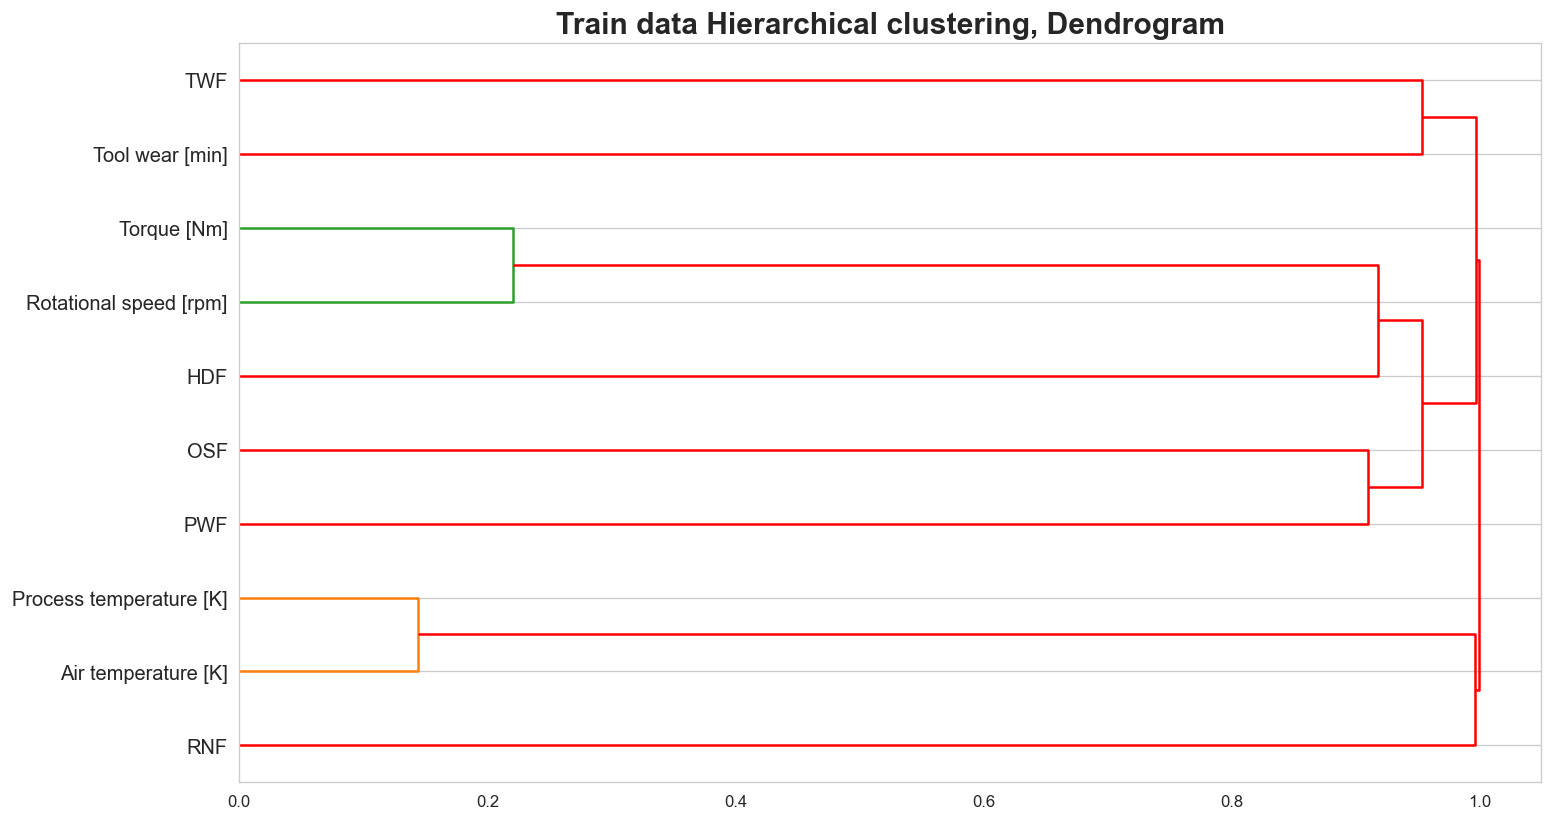

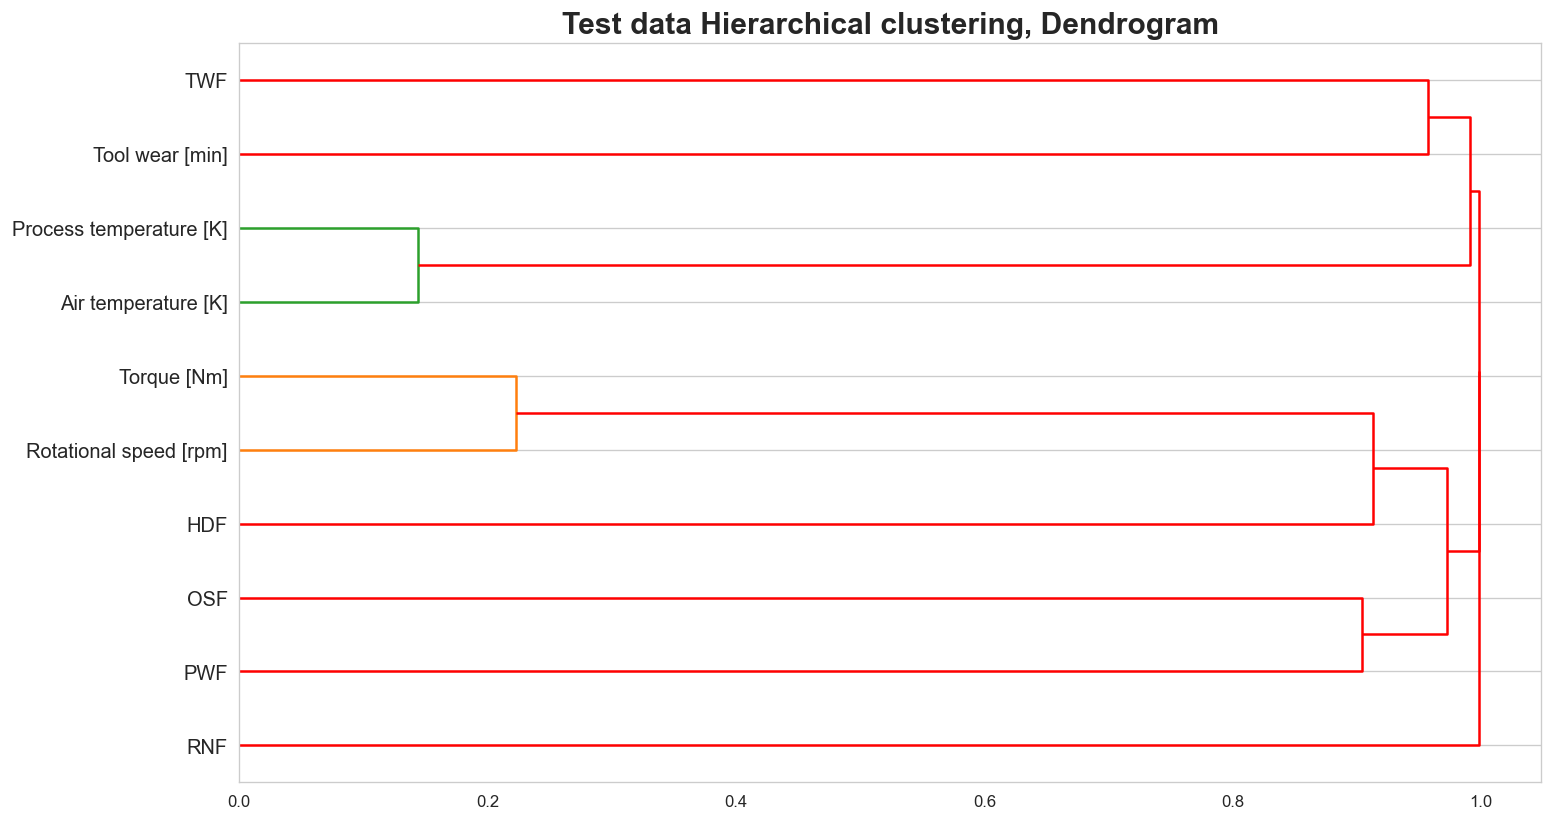

In [88]:
def hierarchical_clustering(data, title):
    fig, ax = plt.subplots(1, 1, figsize=(14, 8), dpi=120)
    correlations = data.corr()
    converted_corr = 1 - np.abs(correlations)
    Z = linkage(squareform(converted_corr), 'complete')
    
    dn = dendrogram(Z, labels=data.columns, ax=ax, above_threshold_color='#ff0000', orientation='right')
    hierarchy.set_link_color_palette(None)
    plt.grid(axis='x')
    plt.title(f'{title} Hierarchical clustering, Dendrogram', fontsize=18, fontweight='bold')
    plt.show()

hierarchical_clustering(df_train[col_numeric+col_categoric], title='Train data')
hierarchical_clustering(df_test[col_numeric+col_categoric], title='Test data')

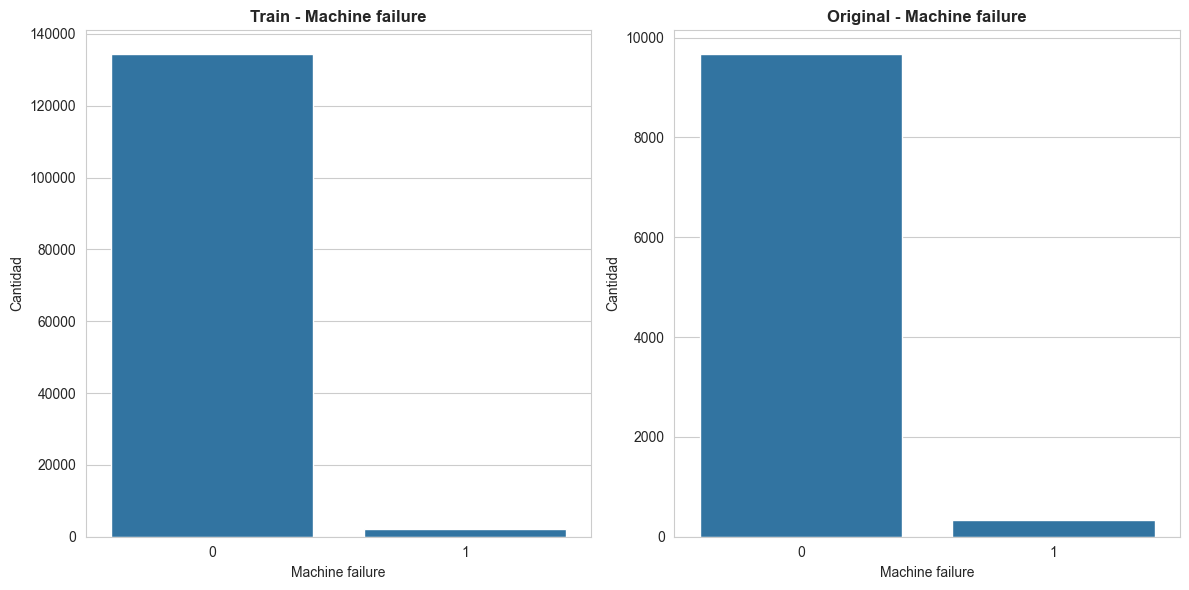

In [89]:
# Crea una figura y ejes para los subgráficos
plt.figure(figsize=(12, 6))

# Gráfico 1: Countplot para df_train
plt.subplot(1, 2, 1)
sns.countplot(data=df_train, x='Machine failure')
plt.title('Train - Machine failure', fontsize=12, weight='bold')
plt.ylabel('Cantidad')

# Gráfico 2: Countplot para df_original
plt.subplot(1, 2, 2)
sns.countplot(data=df_original, x='Machine failure')
plt.title('Original - Machine failure', fontsize=12, weight='bold')
plt.ylabel('Cantidad')

# Ajusta el diseño de los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

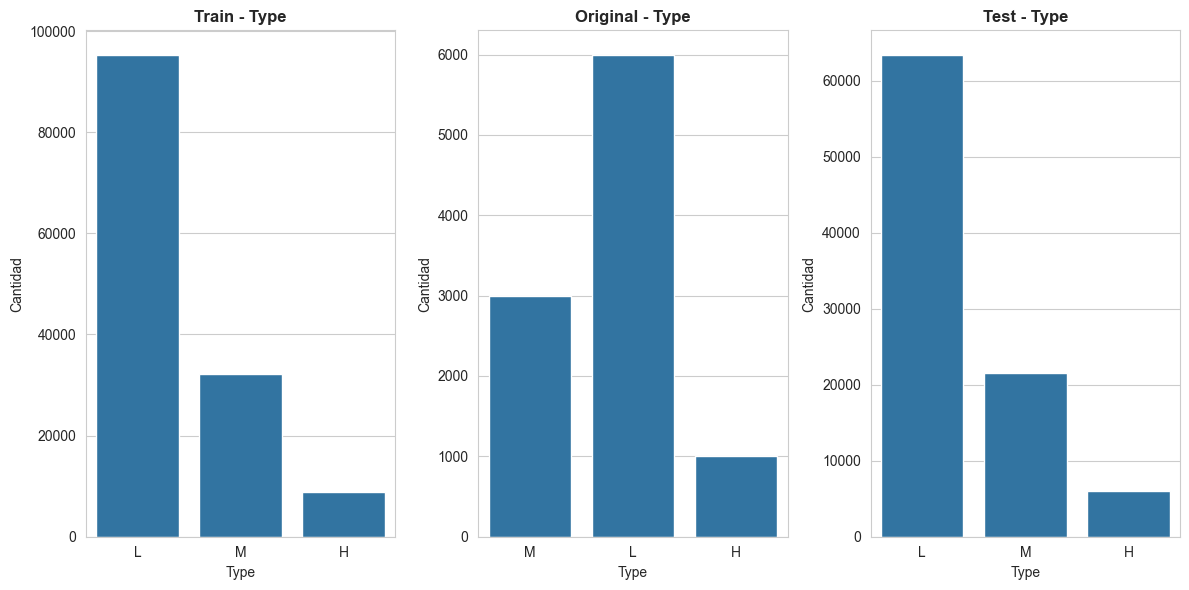

In [90]:
# Crea una figura y ejes para los subgráficos
plt.figure(figsize=(12, 6))

# Gráfico 1: Countplot para df_train
plt.subplot(1, 3, 1)
sns.countplot(data=df_train, x='Type')
plt.title('Train - Type', fontsize=12, weight='bold')
plt.ylabel('Cantidad')

# Gráfico 2: Countplot para df_original
plt.subplot(1, 3, 2)
sns.countplot(data=df_original, x='Type')
plt.title('Original - Type', fontsize=12, weight='bold')
plt.ylabel('Cantidad')

# Gráfico 2: Countplot para df_original
plt.subplot(1, 3, 3)
sns.countplot(data=df_test, x='Type')
plt.title('Test - Type', fontsize=12, weight='bold')
plt.ylabel('Cantidad')

# Ajusta el diseño de los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

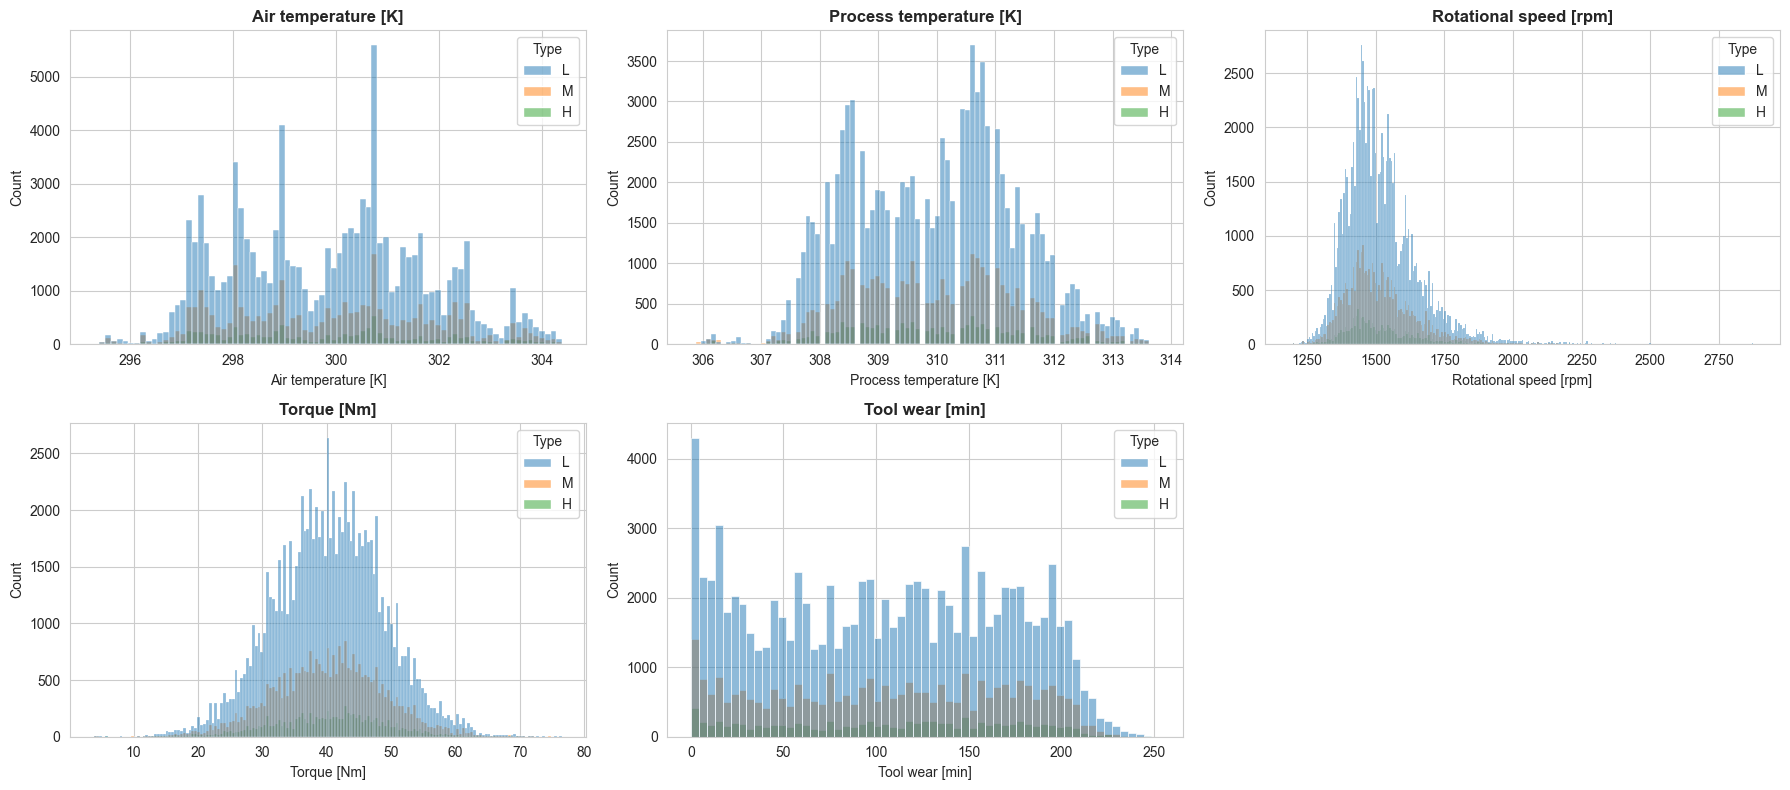

In [91]:
rows=2
columns=3
# Calcula el número total de subgráficos
total_plots = rows * columns
plt.figure(figsize=(18,8))
for i,col in enumerate(col_numeric):
    if i<total_plots:
        plt.subplot(rows,columns,i+1)
        sns.histplot(data=df_train,x=col,hue='Type')
        plt.title(col,fontsize=12,weight='bold')
    else:
        break
plt.tight_layout()

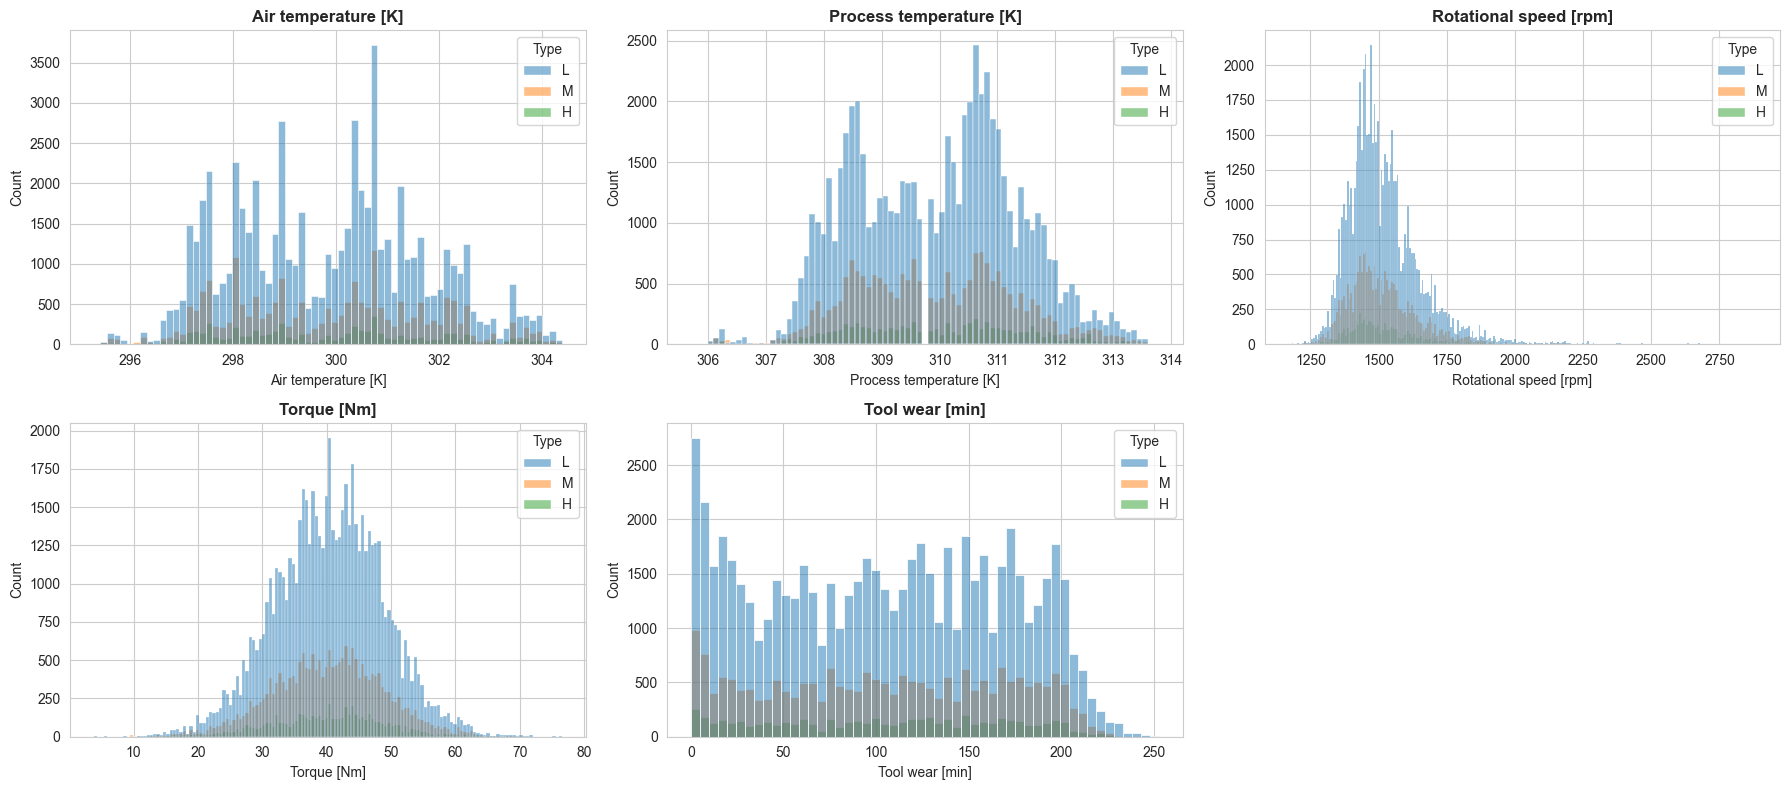

In [92]:
rows=2
columns=3
# Calcula el número total de subgráficos
total_plots = rows * columns
plt.figure(figsize=(18,8))
for i,col in enumerate(col_numeric):
    if i<total_plots:
        plt.subplot(rows,columns,i+1)
        sns.histplot(data=df_test,x=col,hue='Type')
        plt.title(col,fontsize=12,weight='bold')
    else:
        break
plt.tight_layout()

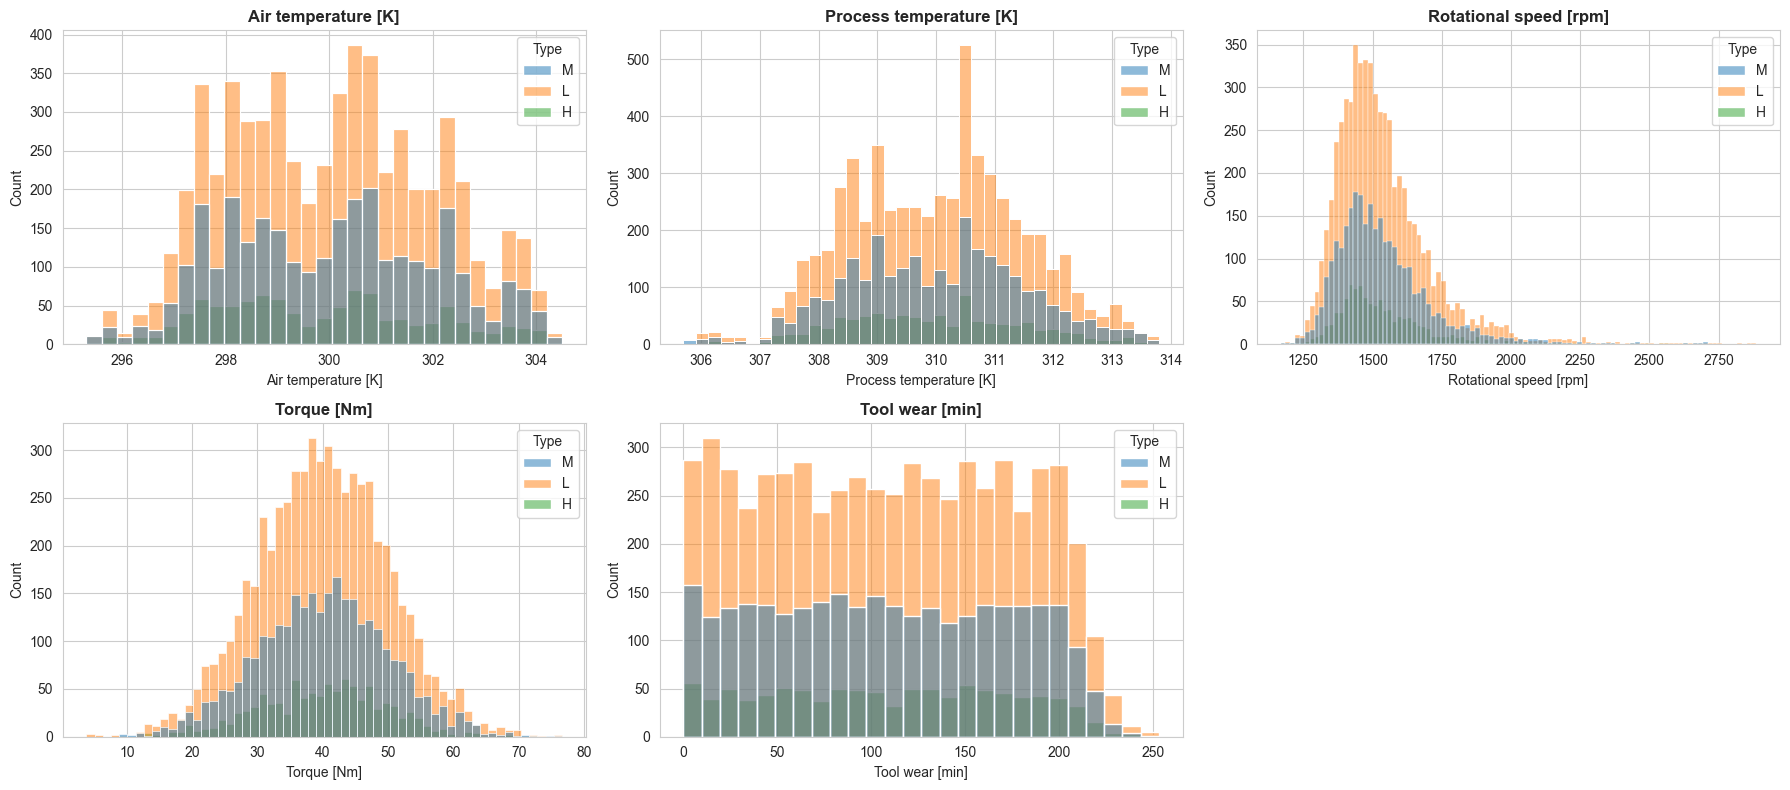

In [93]:
rows=2
columns=3
# Calcula el número total de subgráficos
total_plots = rows * columns
plt.figure(figsize=(18,8))
for i,col in enumerate(col_numeric):
    if i<total_plots:
        plt.subplot(rows,columns,i+1)
        sns.histplot(data=df_original,x=col,hue='Type')
        plt.title(col,fontsize=12,weight='bold')
    else:
        break
plt.tight_layout()

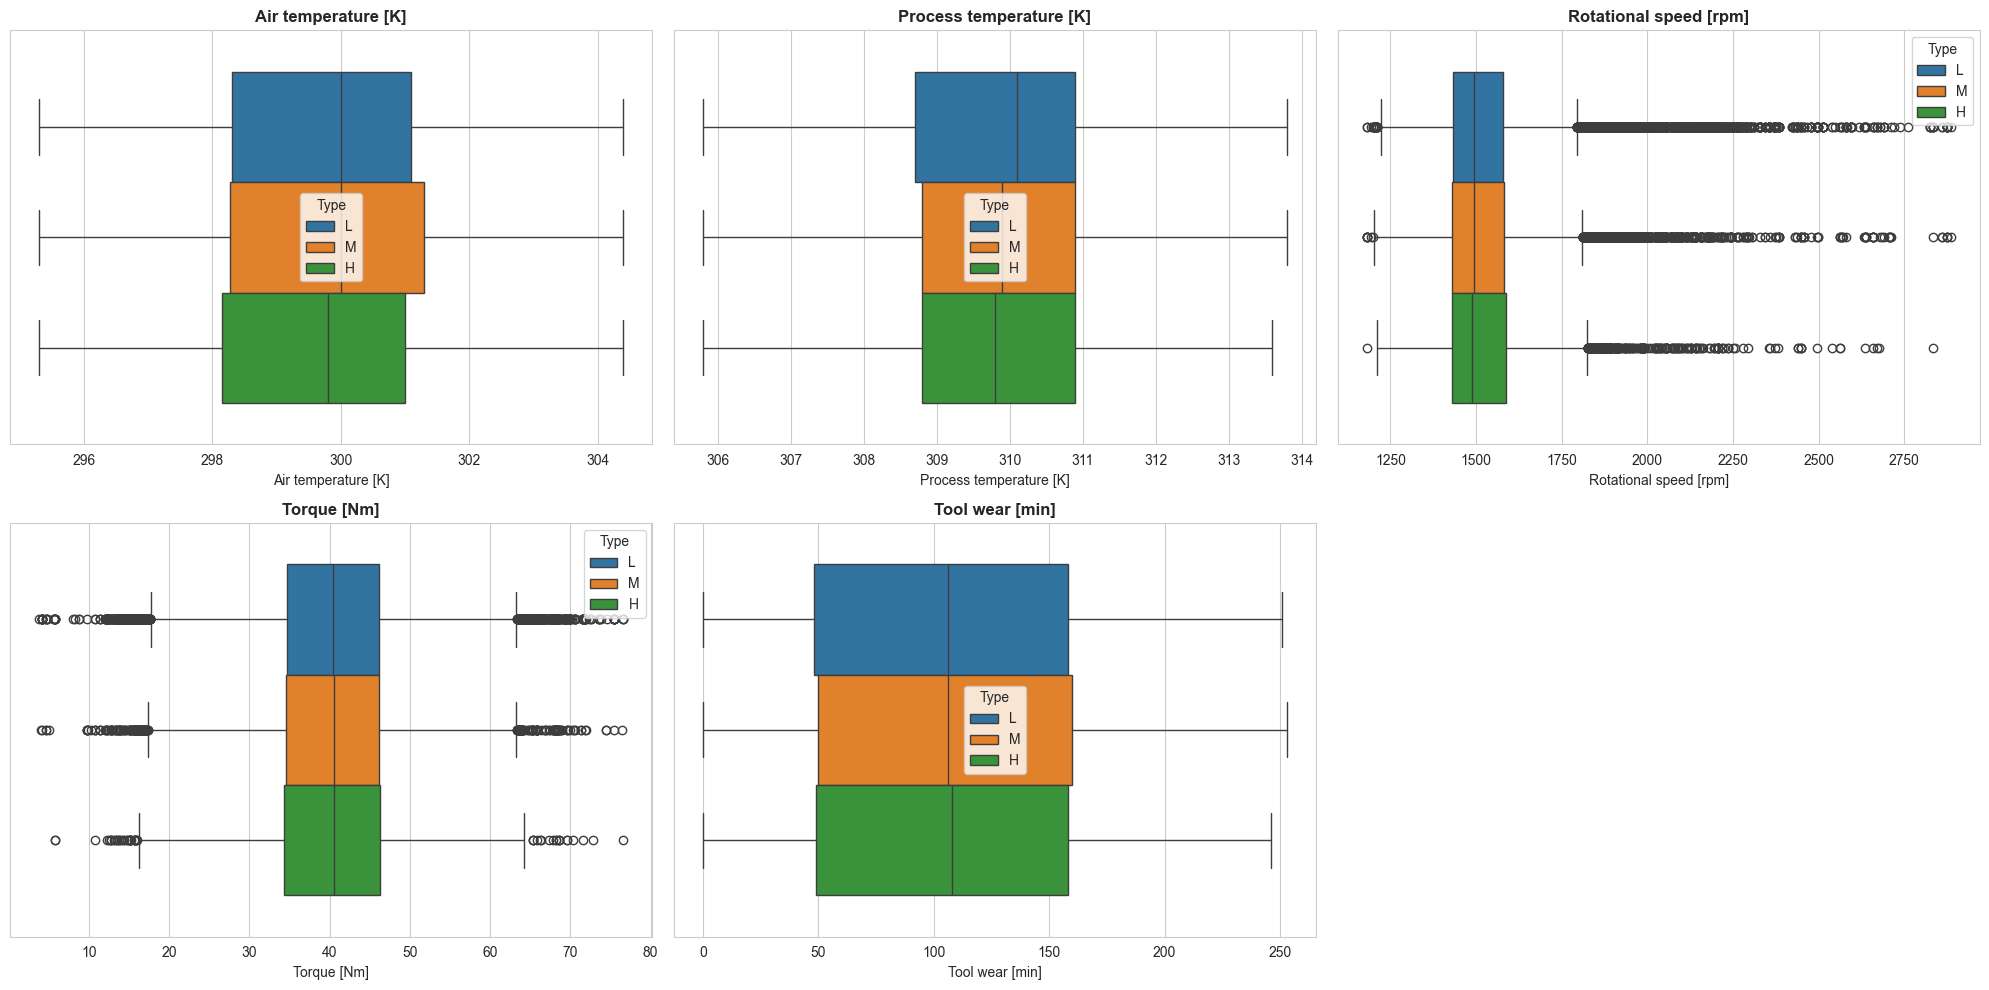

In [94]:
rows=2
columns=3
# Calcula el número total de subgráficos
total_plots = rows * columns
plt.figure(figsize=(20,10))
for i,col in enumerate(col_numeric):
    if i<total_plots:
        plt.subplot(rows,columns,i+1)
        sns.boxplot(data=df_train,x=col,hue='Type')
        plt.title(col,fontsize=12,weight='bold')
    else:
        break
plt.tight_layout()

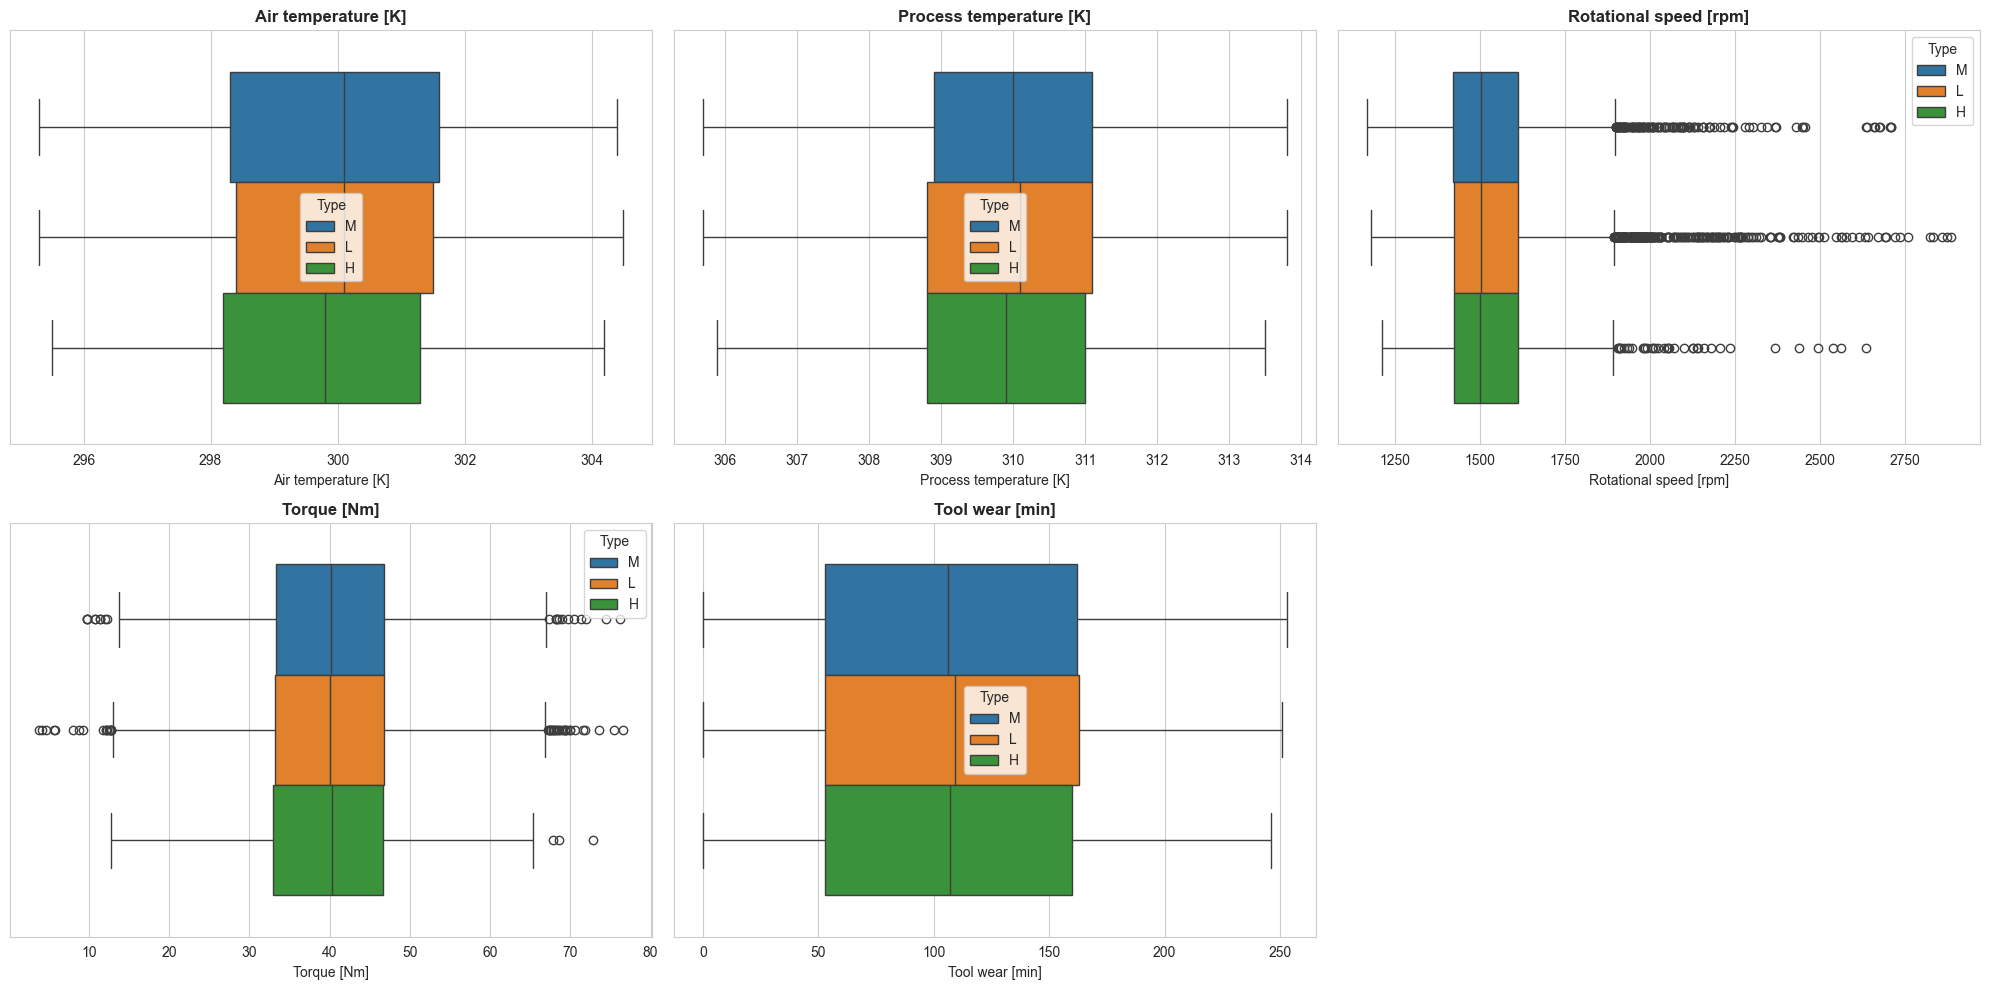

In [95]:
rows=2
columns=3
# Calcula el número total de subgráficos
total_plots = rows * columns
plt.figure(figsize=(20,10))
for i,col in enumerate(col_numeric):
    if i<total_plots:
        plt.subplot(rows,columns,i+1)
        sns.boxplot(data=df_original,x=col,hue='Type')
        plt.title(col,fontsize=12,weight='bold')
    else:
        break
plt.tight_layout()

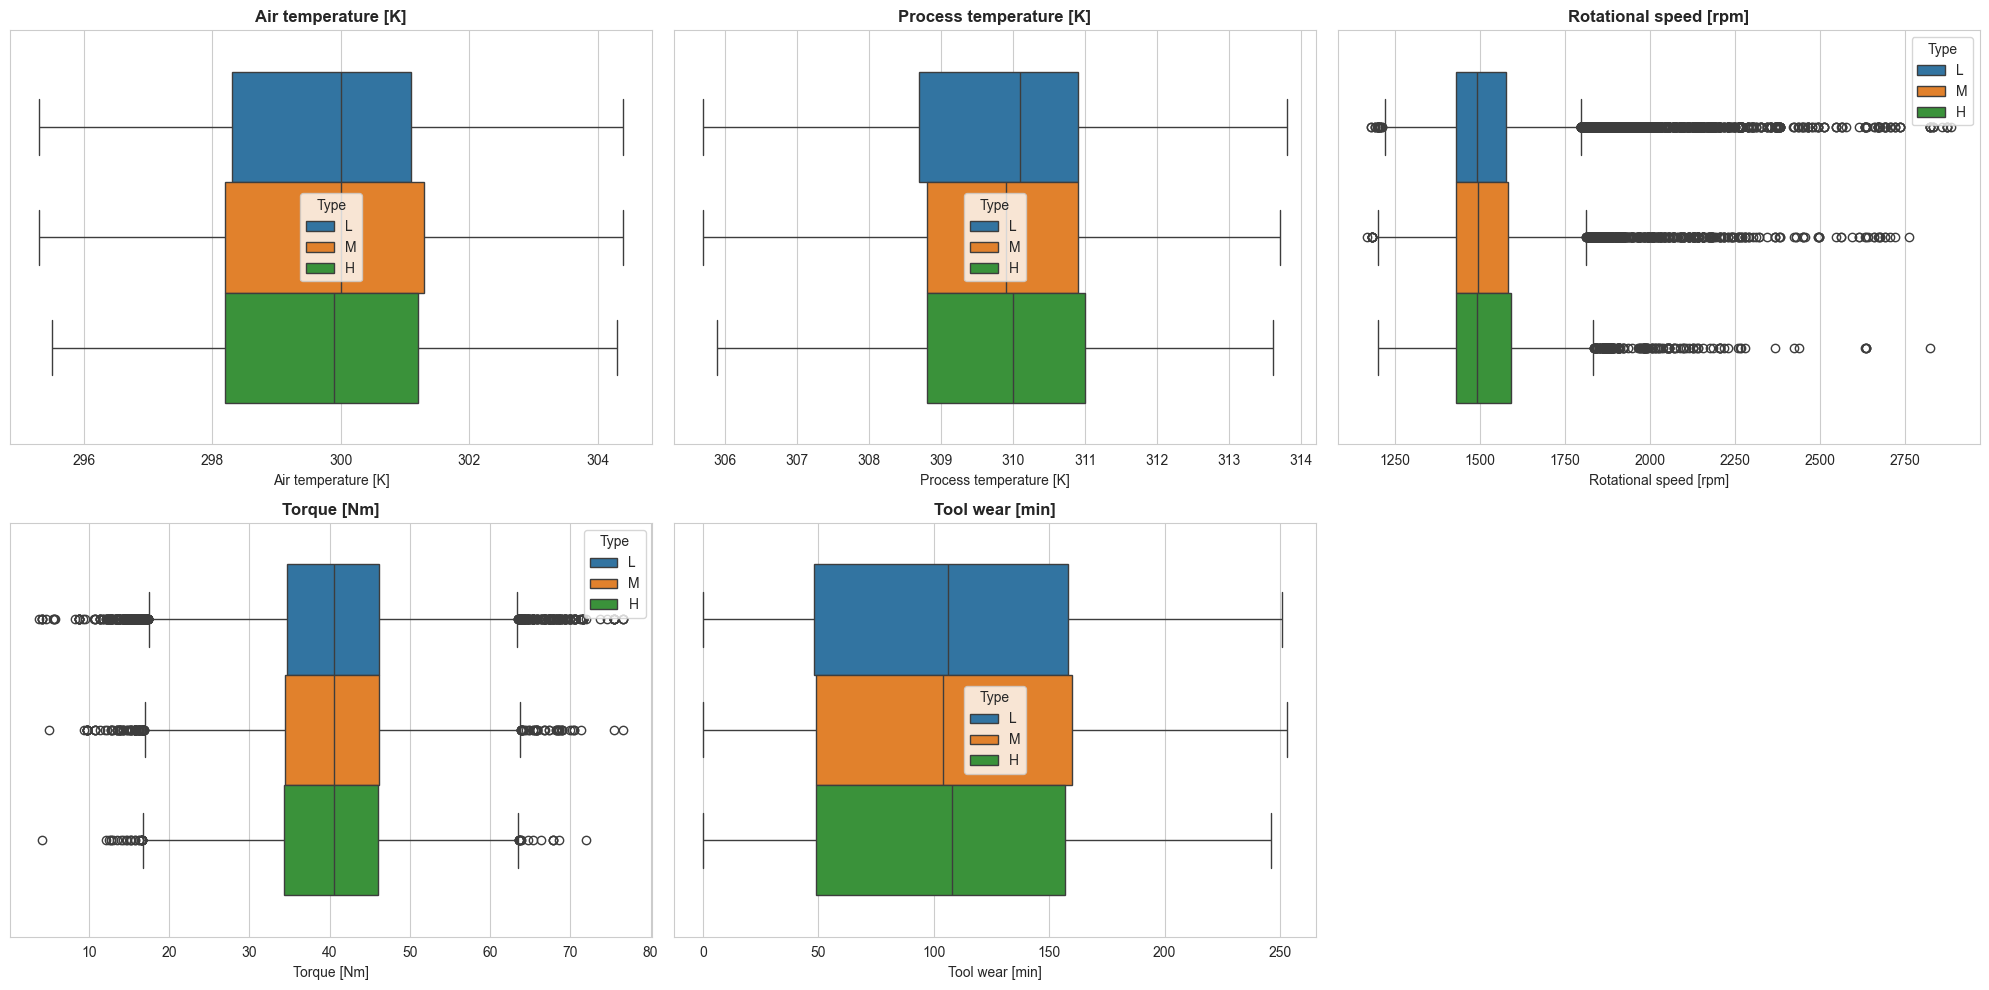

In [96]:
rows=2
columns=3
# Calcula el número total de subgráficos
total_plots = rows * columns
plt.figure(figsize=(20,10))
for i,col in enumerate(col_numeric):
    if i<total_plots:
        plt.subplot(rows,columns,i+1)
        sns.boxplot(data=df_test,x=col,hue='Type')
        plt.title(col,fontsize=12,weight='bold')
    else:
        break
plt.tight_layout()

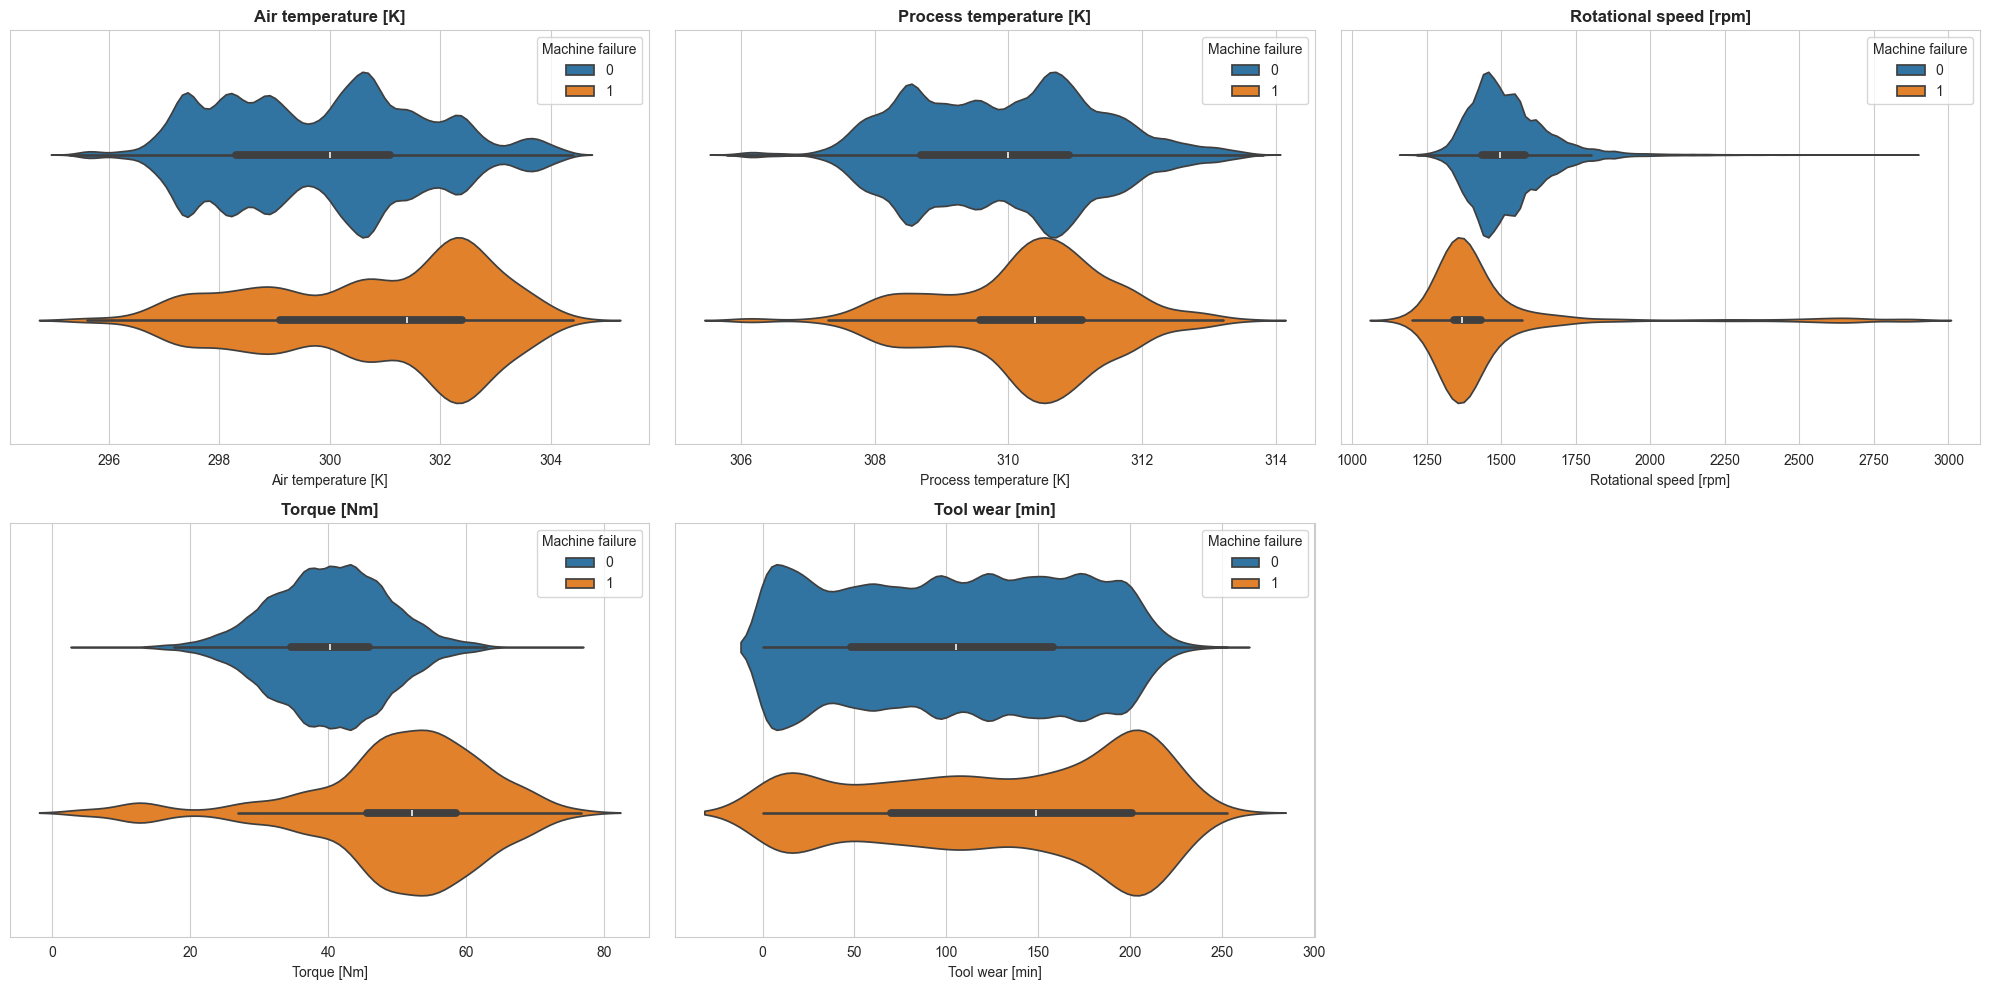

In [97]:
rows=2
columns=3
# Calcula el número total de subgráficos
total_plots = rows * columns
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
for i,col in enumerate(col_numeric):
    if i<total_plots:
        plt.subplot(rows,columns,i+1)
        sns.violinplot(data=df_train,x=col,hue='Machine failure')
        plt.title(col,fontsize=12,weight='bold')
    else:
        break
plt.tight_layout()

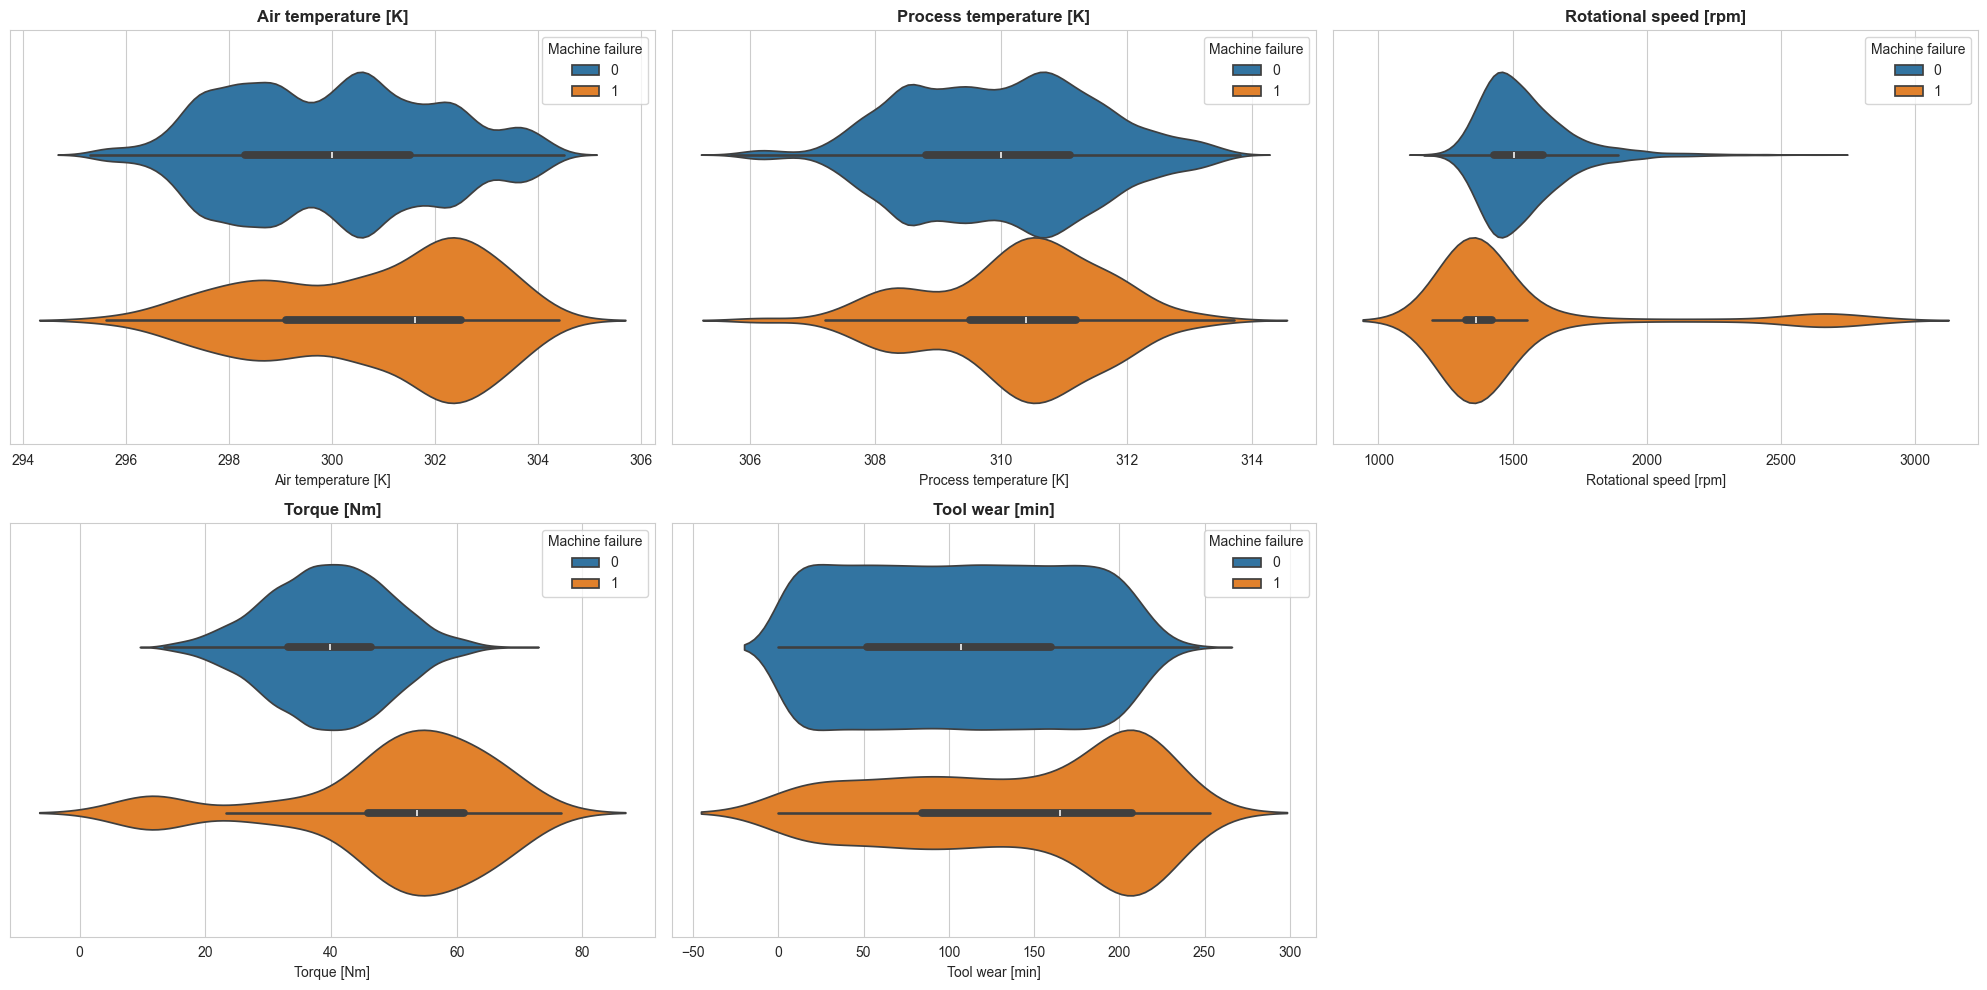

In [98]:
rows=2
columns=3
# Calcula el número total de subgráficos
total_plots = rows * columns
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
for i,col in enumerate(col_numeric):
    if i<total_plots:
        plt.subplot(rows,columns,i+1)
        sns.violinplot(data=df_original,x=col,hue='Machine failure')
        plt.title(col,fontsize=12,weight='bold')
    else:
        break
plt.tight_layout()

## **Feature Engineering**

In [99]:
def create_features_1(df):
    # Create a new feature by divided 'Air temperature' from 'Process temperature'
    df["Temperature ratio"] = df['Process temperature [K]'] / df['Air temperature [K]']
    
    # Create a new feature by multiplying 'Torque' and 'Rotational speed'
    df['Torque * Rotational speed'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']

    # Create a new feature by multiplying 'Torque' by 'Tool wear'
    df['Torque * Tool wear'] = df['Torque [Nm]'] * df['Tool wear [min]']

    # Create a new feature by adding 'Air temperature' and 'Process temperature'
    # df['Temperature sum [K]'] = df['Air temperature [K]'] + df['Process temperature [K]']
    
    # Create a new feature by multiplying 'Torque' by 'Rotational speed'
    df['Torque * Rotational speed'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
    
create_features_1(df_train)
create_features_1(df_test)
create_features_1(df_original)

In [100]:
df_train.drop(columns=['id','Product ID'],axis=1,inplace=True)
df_test.drop(columns=['id','Product ID'],axis=1,inplace=True)
df_original.drop(columns=['UDI','Product ID'],axis=1,inplace=True)

In [104]:
def replace_Type(df):
    
    df["Type"] = df["Type"].replace({'L':0})
    df["Type"] = df["Type"].replace({'M':1})
    df["Type"] = df["Type"].replace({'H':2})
    df["Type"] = df["Type"].astype(int)
    
    return df

replace_Type(df_train)
replace_Type(df_test)
replace_Type(df_original)

Type  Air temperature [K]  Process temperature [K]  \
0        1                298.1                    308.6   
1        0                298.2                    308.7   
2        0                298.1                    308.5   
3        0                298.2                    308.6   
4        0                298.2                    308.7   
...    ...                  ...                      ...   
9995     1                298.8                    308.4   
9996     2                298.9                    308.4   
9997     1                299.0                    308.6   
9998     2                299.0                    308.7   
9999     1                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  Temperature ratio  Torque * Rotational speed  \
0       0    0    0    0    0           1.035223                    66382.8   
1       0    0    0    0    0           1.035211                    65190.4   
2       0    0    0    0    0           1.034888                    74001.2   
3       0    0    0    0    0           1.034876                    56603.5   
4       0    0    0    0    0           1.035211                    56320.0   
...   ...  ...  ...  ...  ...                ...                        ...   
9995    0    0    0    0    0           1.032129                    47318.0   
9996    0    0    0    0    0           1.031783                    51897.6   
9997    0    0    0    0    0           1.032107                    54943.0   
9998    0    0    0    0    0           1.032441                    68288.0   
9999    0    0    0    0    0           1.032441                    60300.0   

      Torque * Tool wear  
0                    0.0  
1                  138.9  
2                  247.0  
3                  276.5  
4                  360.0  
...                  ...  
9995               413.0  
9996               540.6  
9997               734.8  
9998              1212.5  
9999              1206.0  

[10000 rows x 15 columns]

In [111]:
data_numeric=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Temperature ratio', 'Torque * Rotational speed', 'Torque * Tool wear']

In [113]:
data_cat=['Type','Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [110]:
scaler=StandardScaler()
# Ajustar el scaler a los datos y transformar los datos
scaled_data = scaler.fit_transform(df_train[data_numeric])
# Convertir los datos escalados a un DataFrame de pandas
df_scaled = pd.DataFrame(scaled_data, columns=data_numeric)
df_scaled.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0             0.395880                -0.246230                0.545416   
1             1.469856                 1.558605                1.720308   
2            -0.302204                -1.040358                2.051873   
3             0.610675                 0.692284                0.026445   
4            -1.000288                -0.679391                0.869773   

   Torque [Nm]  Tool wear [min]  Temperature ratio  Torque * Rotational speed  \
0    -0.499711         0.556417          -1.075348                  -0.294639   
1    -1.323028         1.494433          -0.650894                  -0.969107   
2    -1.628831        -1.241447          -0.842389                  -1.321034   
3     0.464745         1.447532          -0.214379                   0.743769   
4    -0.582043        -1.100744           0.959472                  -0.244720   

   Torque * Tool wear  
0            0.303445  
1            0.579188  
2           -1.277397  
3            1.625679  
4           -1.082613

In [116]:
scaler=StandardScaler()
# Ajustar el scaler a los datos y transformar los datos
scaled_data_test = scaler.fit_transform(df_test[data_numeric])
# Convertir los datos escalados a un DataFrame de pandas
df_scaled_test = pd.DataFrame(scaled_data_test, columns=data_numeric)
df_scaled_test.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0             1.313830                 1.126570               -0.153806   
1             0.990824                 0.765635                1.375097   
2             0.775487                 0.332512                0.031949   
3             0.129475                -0.244985               -0.296694   
4             1.906008                 1.704068               -0.039496   

   Torque [Nm]  Tool wear [min]  Temperature ratio  Torque * Rotational speed  \
0    -0.274579        -0.693494          -0.935951                  -0.360978   
1    -1.356341        -1.366729          -0.821201                  -1.160560   
2    -0.309854        -0.129855          -1.003542                  -0.305367   
3     0.854217        -1.554608          -0.577991                   1.047737   
4     0.113445         0.151964          -1.257716                   0.226843   

   Torque * Tool wear  
0           -0.693257  
1           -1.338257  
2           -0.210804  
3           -1.428897  
4            0.181513

In [114]:
for i in data_cat:
    df_scaled[i]=df_train[i]
df_scaled.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0             0.395880                -0.246230                0.545416   
1             1.469856                 1.558605                1.720308   
2            -0.302204                -1.040358                2.051873   
3             0.610675                 0.692284                0.026445   
4            -1.000288                -0.679391                0.869773   

   Torque [Nm]  Tool wear [min]  Temperature ratio  Torque * Rotational speed  \
0    -0.499711         0.556417          -1.075348                  -0.294639   
1    -1.323028         1.494433          -0.650894                  -0.969107   
2    -1.628831        -1.241447          -0.842389                  -1.321034   
3     0.464745         1.447532          -0.214379                   0.743769   
4    -0.582043        -1.100744           0.959472                  -0.244720   

   Torque * Tool wear  Type  Machine failure  TWF  HDF  PWF  OSF  RNF  
0            0.303445     0                0    0    0    0    0    0  
1            0.579188     1                0    0    0    0    0    0  
2           -1.277397     0                0    0    0    0    0    0  
3            1.625679     0                0    0    0    0    0    0  
4           -1.082613     1                0    0    0    0    0    0

In [117]:
data_cat_v1=['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
for i in data_cat_v1:
    df_scaled_test[i]=df_test[i]
df_scaled_test.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0             1.313830                 1.126570               -0.153806   
1             0.990824                 0.765635                1.375097   
2             0.775487                 0.332512                0.031949   
3             0.129475                -0.244985               -0.296694   
4             1.906008                 1.704068               -0.039496   

   Torque [Nm]  Tool wear [min]  Temperature ratio  Torque * Rotational speed  \
0    -0.274579        -0.693494          -0.935951                  -0.360978   
1    -1.356341        -1.366729          -0.821201                  -1.160560   
2    -0.309854        -0.129855          -1.003542                  -0.305367   
3     0.854217        -1.554608          -0.577991                   1.047737   
4     0.113445         0.151964          -1.257716                   0.226843   

   Torque * Tool wear  Type  TWF  HDF  PWF  OSF  RNF  
0           -0.693257     0    0    0    0    0    0  
1           -1.338257     0    0    0    0    0    0  
2           -0.210804     0    0    0    0    0    0  
3           -1.428897     1    0    0    0    0    0  
4            0.181513     1    0    0    0    0    0

In [118]:
X=df_scaled.drop('Machine failure',axis=1)
y=df_scaled['Machine failure']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


## **Logistic Regression**

Sobreajuste (Overfitting):

* Si la puntuación de entrenamiento es significativamente más alta que la puntuación de prueba, es probable que el modelo haya sobreajustado los datos de entrenamiento, es decir, se ha ajustado demasiado a los datos de entrenamiento y no generaliza bien para datos no vistos.
Esto indica que el modelo puede haber memorizado los datos de entrenamiento en lugar de aprender patrones subyacentes.
Subajuste (Underfitting):

* Si tanto la puntuación de entrenamiento como la de prueba son bajas, es posible que el modelo esté subajustando los datos de entrenamiento, lo que significa que el modelo no es lo suficientemente complejo como para capturar la estructura de los datos.
En este caso, el modelo puede necesitar más características, mayor complejidad o un ajuste de hiperparámetros adecuado para mejorar su desempeño.

In [120]:
from sklearn.linear_model import LogisticRegression
logistic_regressor=LogisticRegression()
logistic_regressor.fit(X_train,y_train)
logistic_regression_train_score=logistic_regressor.score(X_train,y_train)
logistic_regression_test_score=logistic_regressor.score(X_test,y_test)
print(logistic_regression_train_score)
print(logistic_regression_test_score)

0.9961060260392329
0.9960419262625523


In [121]:
if logistic_regression_train_score > logistic_regression_test_score:
    print("El modelo está experimentando sobreajuste.")
elif logistic_regression_train_score < logistic_regression_test_score:
    print("El modelo está experimentando subajuste.")
else:
    print("El modelo está generalizando bien.")

El modelo está experimentando sobreajuste.


In [123]:

logistic_regression_prediction=logistic_regressor.predict(X_test)
logistic_mse=mean_squared_error(y_test,logistic_regression_prediction)
logistic_rmse=np.sqrt(logistic_mse)
print('MSE:{0}\n RMSE: {1}'.format(logistic_mse.round(4),logistic_rmse.round(4)))

MSE:0.004
 RMSE: 0.0629


## **Training Random Forest**

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
tree_classifier= RandomForestClassifier(n_estimators=300)
tree_classifier.fit(X_train,y_train)  

RandomForestClassifier(n_estimators=300)

In [130]:
tree_train_score=tree_classifier.score(X_train,y_train)
tree_test_score=tree_classifier.score(X_test,y_test)
print(tree_train_score)
print(tree_test_score)

0.9998442410415693
0.9961518727552591


In [132]:
if tree_train_score > tree_test_score:
    print("El modelo está experimentando sobreajuste.")
elif tree_train_score < tree_test_score:
    print("El modelo está experimentando subajuste.")
else:
    print("El modelo está generalizando bien.")

El modelo está experimentando sobreajuste.


In [133]:
tree_prediction=tree_classifier.predict(X_test)
tree_mse=mean_squared_error(y_test,tree_prediction)
tree_rmse=np.sqrt(tree_mse)
print('MSE :{}\n RMSE : {}'.format(tree_mse.round(3),tree_rmse.round(3)))

MSE :0.004
 RMSE : 0.062


In [134]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':tree_classifier.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

Feature     Score
0          HDF  0.250598
1          OSF  0.199770
2          PWF  0.100704
3          TWF  0.082862
4  Torque [Nm]  0.062599

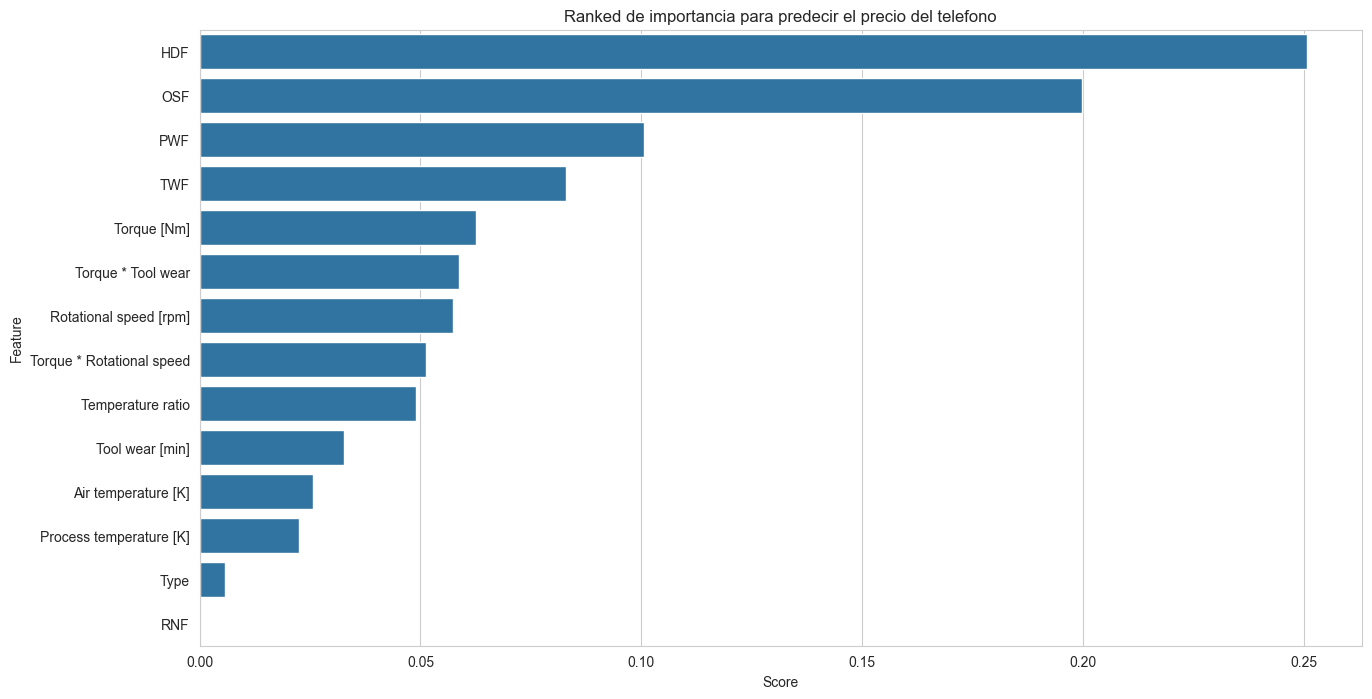

In [135]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.barplot(x=feature_importance['Score'],y=feature_importance['Feature'])
plt.title("Ranked de importancia para predecir el precio del telefono")
plt.show()